In [1]:
import os
import sys
import numpy as np

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.loading_data import load_dataset
from functions.class_weights import calculate_class_weight
from functions.model_running import get_run_number, run_model
from models.inception_resnet_v2_models import get_basic_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'inception_7_class_weights_only_whole_model_trainable'

In [3]:
BATCH_SIZE = 64
dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
class_weight = calculate_class_weight(dataset, .6)

Found 8015 files belonging to 7 classes.


In [4]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
126/126 [==============================] - ETA: 0s - loss: 6.6975 - categorical cross entropy: 1.8233 - mean squared error: 0.0688 - accuracy: 0.6634 - auc: 0.7371 - prc: 0.2256

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_1\assets


126/126 [==============================] - 142s 914ms/step - loss: 6.6975 - categorical cross entropy: 1.8233 - mean squared error: 0.0688 - accuracy: 0.6634 - auc: 0.7371 - prc: 0.2256 - val_loss: 1.4700 - val_categorical cross entropy: 1.4700 - val_mean squared error: 0.0606 - val_accuracy: 0.6970 - val_auc: 0.8063 - val_prc: 0.3267 - lr: 0.0010
Epoch 2/100
126/126 [==============================] - ETA: 0s - loss: 2.9381 - categorical cross entropy: 0.8027 - mean squared error: 0.0546 - accuracy: 0.7082 - auc: 0.8752 - prc: 0.3776

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_2\assets


126/126 [==============================] - 119s 948ms/step - loss: 2.9381 - categorical cross entropy: 0.8027 - mean squared error: 0.0546 - accuracy: 0.7082 - auc: 0.8752 - prc: 0.3776 - val_loss: 0.7311 - val_categorical cross entropy: 0.7311 - val_mean squared error: 0.0510 - val_accuracy: 0.7455 - val_auc: 0.8881 - val_prc: 0.4956 - lr: 0.0010
Epoch 3/100
126/126 [==============================] - ETA: 0s - loss: 2.6147 - categorical cross entropy: 0.7249 - mean squared error: 0.0510 - accuracy: 0.7372 - auc: 0.9021 - prc: 0.4639

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_3\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_3\assets


126/126 [==============================] - 114s 908ms/step - loss: 2.6147 - categorical cross entropy: 0.7249 - mean squared error: 0.0510 - accuracy: 0.7372 - auc: 0.9021 - prc: 0.4639 - val_loss: 0.6662 - val_categorical cross entropy: 0.6662 - val_mean squared error: 0.0468 - val_accuracy: 0.7600 - val_auc: 0.9046 - val_prc: 0.5560 - lr: 0.0010
Epoch 4/100
126/126 [==============================] - ETA: 0s - loss: 2.3621 - categorical cross entropy: 0.6661 - mean squared error: 0.0480 - accuracy: 0.7558 - auc: 0.9212 - prc: 0.5299

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_4\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_4\assets


126/126 [==============================] - 116s 920ms/step - loss: 2.3621 - categorical cross entropy: 0.6661 - mean squared error: 0.0480 - accuracy: 0.7558 - auc: 0.9212 - prc: 0.5299 - val_loss: 0.6357 - val_categorical cross entropy: 0.6357 - val_mean squared error: 0.0447 - val_accuracy: 0.7740 - val_auc: 0.9137 - val_prc: 0.6036 - lr: 0.0010
Epoch 5/100
126/126 [==============================] - 58s 453ms/step - loss: 2.2089 - categorical cross entropy: 0.6270 - mean squared error: 0.0452 - accuracy: 0.7704 - auc: 0.9286 - prc: 0.6041 - val_loss: 0.6437 - val_categorical cross entropy: 0.6437 - val_mean squared error: 0.0454 - val_accuracy: 0.7775 - val_auc: 0.9176 - val_prc: 0.6289 - lr: 0.0010
Epoch 6/100
126/126 [==============================] - ETA: 0s - loss: 2.1333 - categorical cross entropy: 0.6046 - mean squared error: 0.0438 - accuracy: 0.7810 - auc: 0.9329 - prc: 0.6159

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_6\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_6\assets


126/126 [==============================] - 116s 927ms/step - loss: 2.1333 - categorical cross entropy: 0.6046 - mean squared error: 0.0438 - accuracy: 0.7810 - auc: 0.9329 - prc: 0.6159 - val_loss: 0.5986 - val_categorical cross entropy: 0.5986 - val_mean squared error: 0.0430 - val_accuracy: 0.7855 - val_auc: 0.9187 - val_prc: 0.6536 - lr: 0.0010
Epoch 7/100
126/126 [==============================] - ETA: 0s - loss: 2.0637 - categorical cross entropy: 0.5851 - mean squared error: 0.0425 - accuracy: 0.7838 - auc: 0.9372 - prc: 0.6315

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_7\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_7\assets


126/126 [==============================] - 120s 954ms/step - loss: 2.0637 - categorical cross entropy: 0.5851 - mean squared error: 0.0425 - accuracy: 0.7838 - auc: 0.9372 - prc: 0.6315 - val_loss: 0.5754 - val_categorical cross entropy: 0.5754 - val_mean squared error: 0.0408 - val_accuracy: 0.7935 - val_auc: 0.9436 - val_prc: 0.7083 - lr: 0.0010
Epoch 8/100
126/126 [==============================] - 64s 506ms/step - loss: 1.9626 - categorical cross entropy: 0.5591 - mean squared error: 0.0409 - accuracy: 0.7938 - auc: 0.9440 - prc: 0.6651 - val_loss: 0.6750 - val_categorical cross entropy: 0.6750 - val_mean squared error: 0.0453 - val_accuracy: 0.7745 - val_auc: 0.9172 - val_prc: 0.6578 - lr: 0.0010
Epoch 9/100
126/126 [==============================] - 66s 527ms/step - loss: 1.8890 - categorical cross entropy: 0.5377 - mean squared error: 0.0397 - accuracy: 0.8002 - auc: 0.9443 - prc: 0.6862 - val_loss: 0.7734 - val_categorical cross entropy: 0.7734 - val_mean squared error: 0.0523 

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_27\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_27\assets


126/126 [==============================] - 125s 994ms/step - loss: 1.9506 - categorical cross entropy: 0.5571 - mean squared error: 0.0405 - accuracy: 0.7959 - auc: 0.9425 - prc: 0.7011 - val_loss: 0.5702 - val_categorical cross entropy: 0.5702 - val_mean squared error: 0.0414 - val_accuracy: 0.7885 - val_auc: 0.9351 - val_prc: 0.6874 - lr: 9.5000e-04
Epoch 28/100
126/126 [==============================] - 64s 503ms/step - loss: 1.7234 - categorical cross entropy: 0.5008 - mean squared error: 0.0374 - accuracy: 0.8152 - auc: 0.9562 - prc: 0.7416 - val_loss: 11.8633 - val_categorical cross entropy: 11.8633 - val_mean squared error: 0.2000 - val_accuracy: 0.2055 - val_auc: 0.5163 - val_prc: 0.1978 - lr: 9.5000e-04
Epoch 29/100
126/126 [==============================] - ETA: 0s - loss: 1.5765 - categorical cross entropy: 0.4597 - mean squared error: 0.0346 - accuracy: 0.8269 - auc: 0.9636 - prc: 0.7790

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_29\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\inception_7_class_weights_only_whole_model_trainable_20_29\assets


126/126 [==============================] - 129s 1s/step - loss: 1.5765 - categorical cross entropy: 0.4597 - mean squared error: 0.0346 - accuracy: 0.8269 - auc: 0.9636 - prc: 0.7790 - val_loss: 0.5588 - val_categorical cross entropy: 0.5588 - val_mean squared error: 0.0395 - val_accuracy: 0.8055 - val_auc: 0.9374 - val_prc: 0.7271 - lr: 9.5000e-04
Epoch 30/100
126/126 [==============================] - 67s 526ms/step - loss: 1.5843 - categorical cross entropy: 0.4642 - mean squared error: 0.0348 - accuracy: 0.8242 - auc: 0.9619 - prc: 0.7781 - val_loss: 0.5773 - val_categorical cross entropy: 0.5773 - val_mean squared error: 0.0407 - val_accuracy: 0.7990 - val_auc: 0.9386 - val_prc: 0.7199 - lr: 9.5000e-04
Epoch 31/100
126/126 [==============================] - 63s 499ms/step - loss: 1.5538 - categorical cross entropy: 0.4532 - mean squared error: 0.0343 - accuracy: 0.8341 - auc: 0.9637 - prc: 0.7901 - val_loss: 4.9967 - val_categorical cross entropy: 4.9967 - val_mean squared error: 

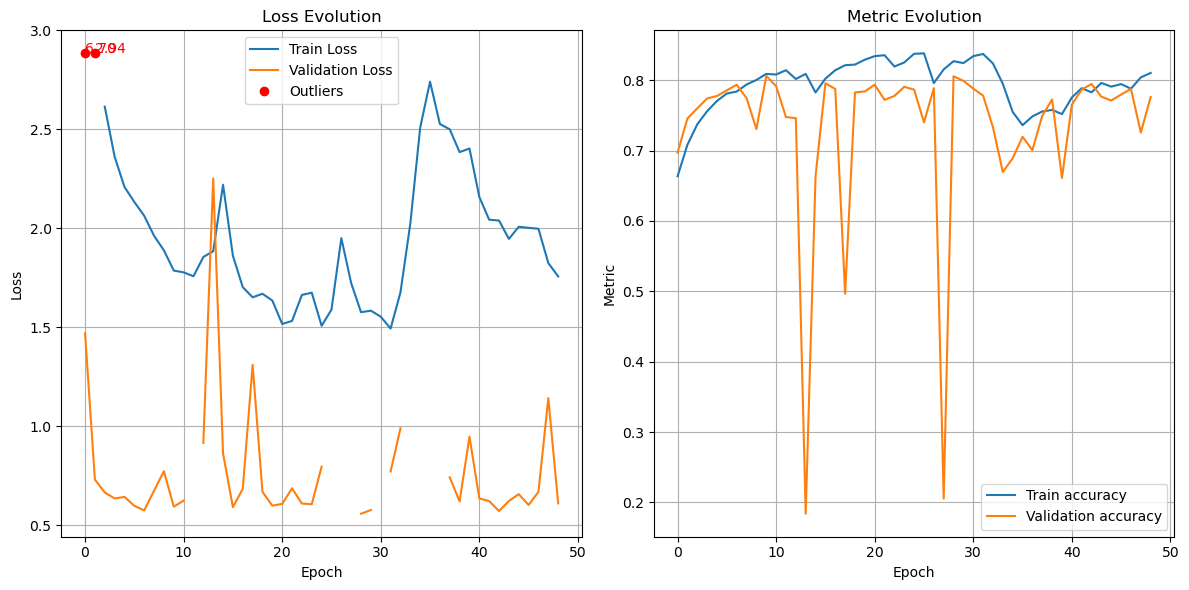

In [5]:
_, history = run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_basic_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers,
    batch_size=BATCH_SIZE,
    class_weight=class_weight,
    stopping_patience=20)